In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

#missing data
from sklearn.impute import SimpleImputer

imp_freq=SimpleImputer(strategy="most_frequent")
titanic[["embarked"]]=imp_freq.fit_transform(titanic[["embarked"]])


imp_median=SimpleImputer(strategy="median")
titanic[["age"]]=imp_freq.fit_transform(titanic[["age"]])





In [10]:
#label encodingg
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic["embarked"]=le.fit_transform(titanic["embarked"])
titanic["sex"]=le.fit_transform(titanic["sex"])



In [18]:

X=titanic[features]
Y=titanic[target]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

#decision tree classifier-NO PRUNING
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)




DecisionTreeClassifier()

In [21]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(Y_test, Y_pred))

accuracy:  0.770949720670391


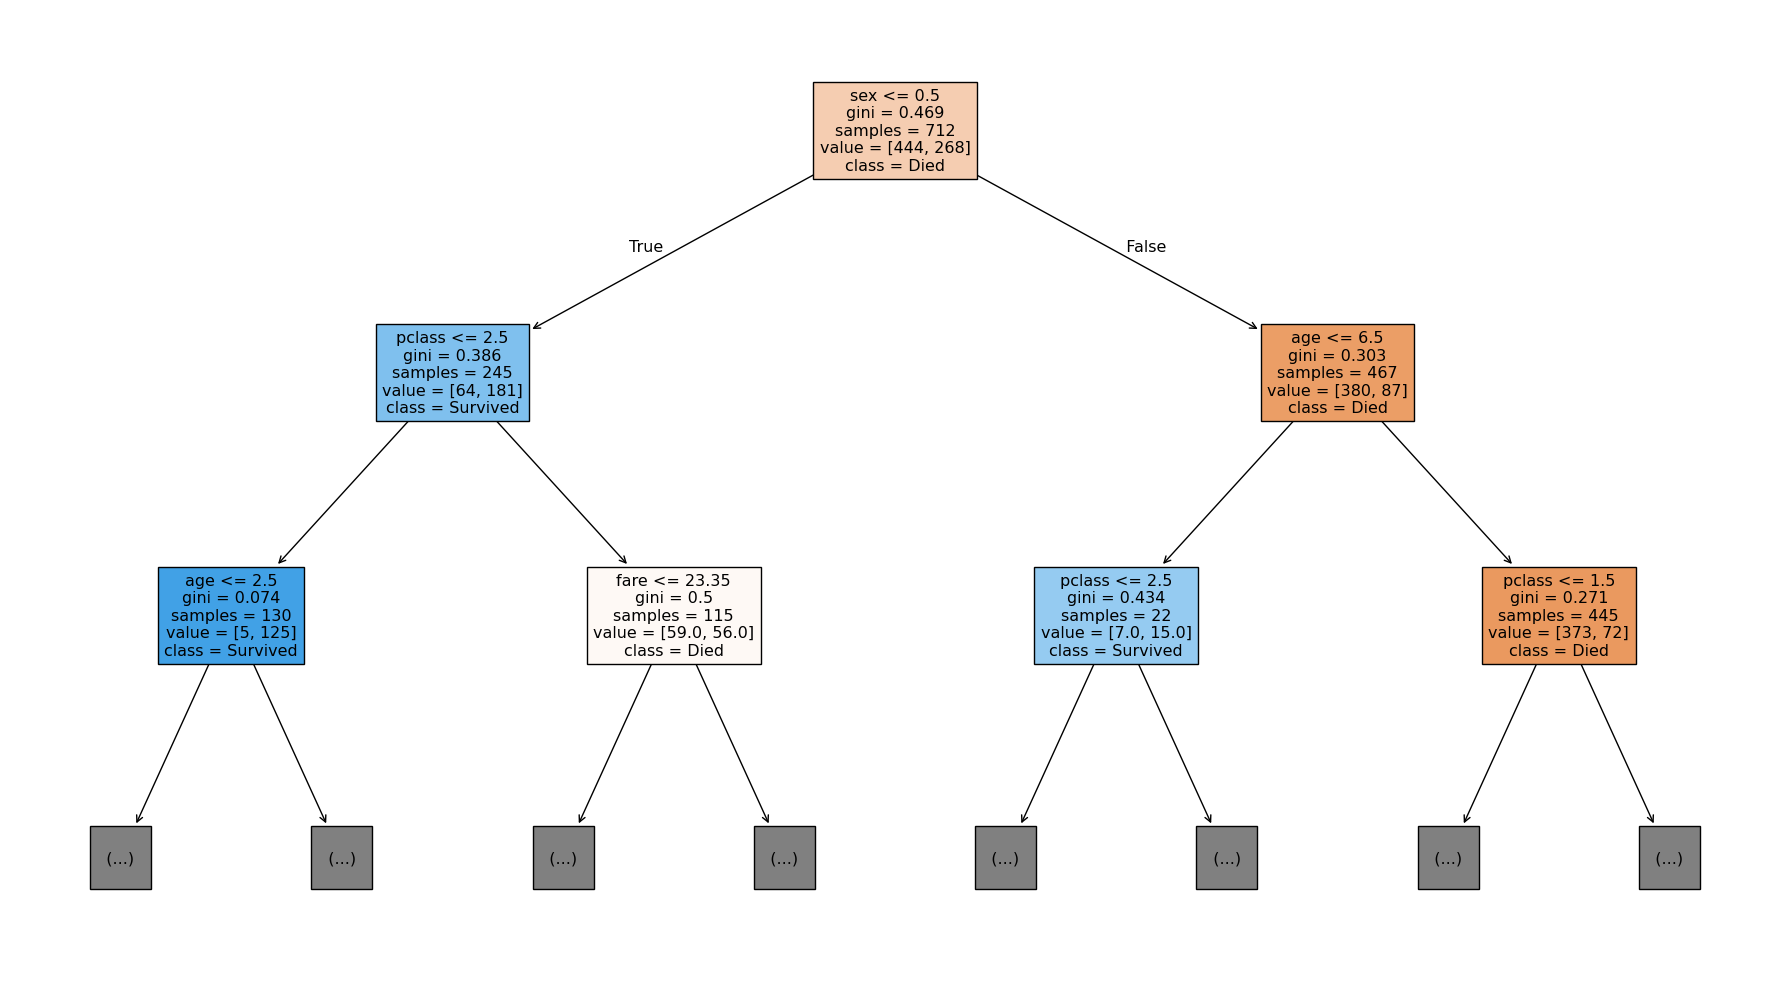

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()

In [30]:
#decision tree with pre pruning

max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train)

    acc = model.score(X_test, Y_test)
    print(f"for depth={depth}, accuracy={acc}")

  '''
  if depth==4:
        plt.figure(figsize=(18, 10))
    plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
    )

    plt.tight_layout()
    plt.show()
    '''

IndentationError: unindent does not match any outer indentation level (<string>, line 12)

In [33]:
#decision tree post pruningg

from sklearn.tree import DecisionTreeClassifier
full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
path=full_tree.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas=path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.24843945e-04
 1.45921494e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 4.47357470e-04 4.68164794e-04 4.68164794e-04 4.68164794e-04
 5.61797753e-04 6.24219725e-04 6.71714704e-04 7.02247191e-04
 7.02247191e-04 8.02568218e-04 8.19288390e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.73907615e-04 8.83699297e-04
 8.94231048e-04 8.97526740e-04 9.24009462e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.38719618e-04 1.00253471e-03 1.05337079e-03 1.07297586e-03
 1.12359551e-03 1.12979822e-03 1.17041199e-03 1.17041199e-03
 1.17041199e-03 1.20642466e-03 1.22566125e-03 1.22893258e-03
 1.24843945e-03 1.27565833e-03 1.30996111e-03 1.33761370e-03
 1.37044603e-03 1.44462279e-03 1.46301498e-03 1.50481541e-03
 1.60434338e-03 1.70101335e-03 1.71660424e-03 1.78745677e-03
 1.86751451e-03 1.96629213e-03 2.14018192e-03 2.17942486e-03
 2.32000512e-03 2.34082397e-03 2.41226470e-03 2.58112043e-03
 2.69412911e-03 3.437709

In [37]:
#training model for all ccp alphas

tree=[]
for alpha in ccp_alphas:
    model=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)

    tree.append((model,alpha))

In [39]:
best_acc=0
best_alpha=0

for model,alpha in tree:
    curr_acc=model.score(X_test,Y_test)
    if curr_acc>best_acc:
        best_acc=curr_acc
        best_alpha=alpha

In [41]:
best_alpha

0.8324022346368715

In [43]:
best_acc

0.8324022346368715

In [51]:
best_model=DecisionTreeClassifier(ccp_alpha=best_alpha)
best_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.8324022346368715)

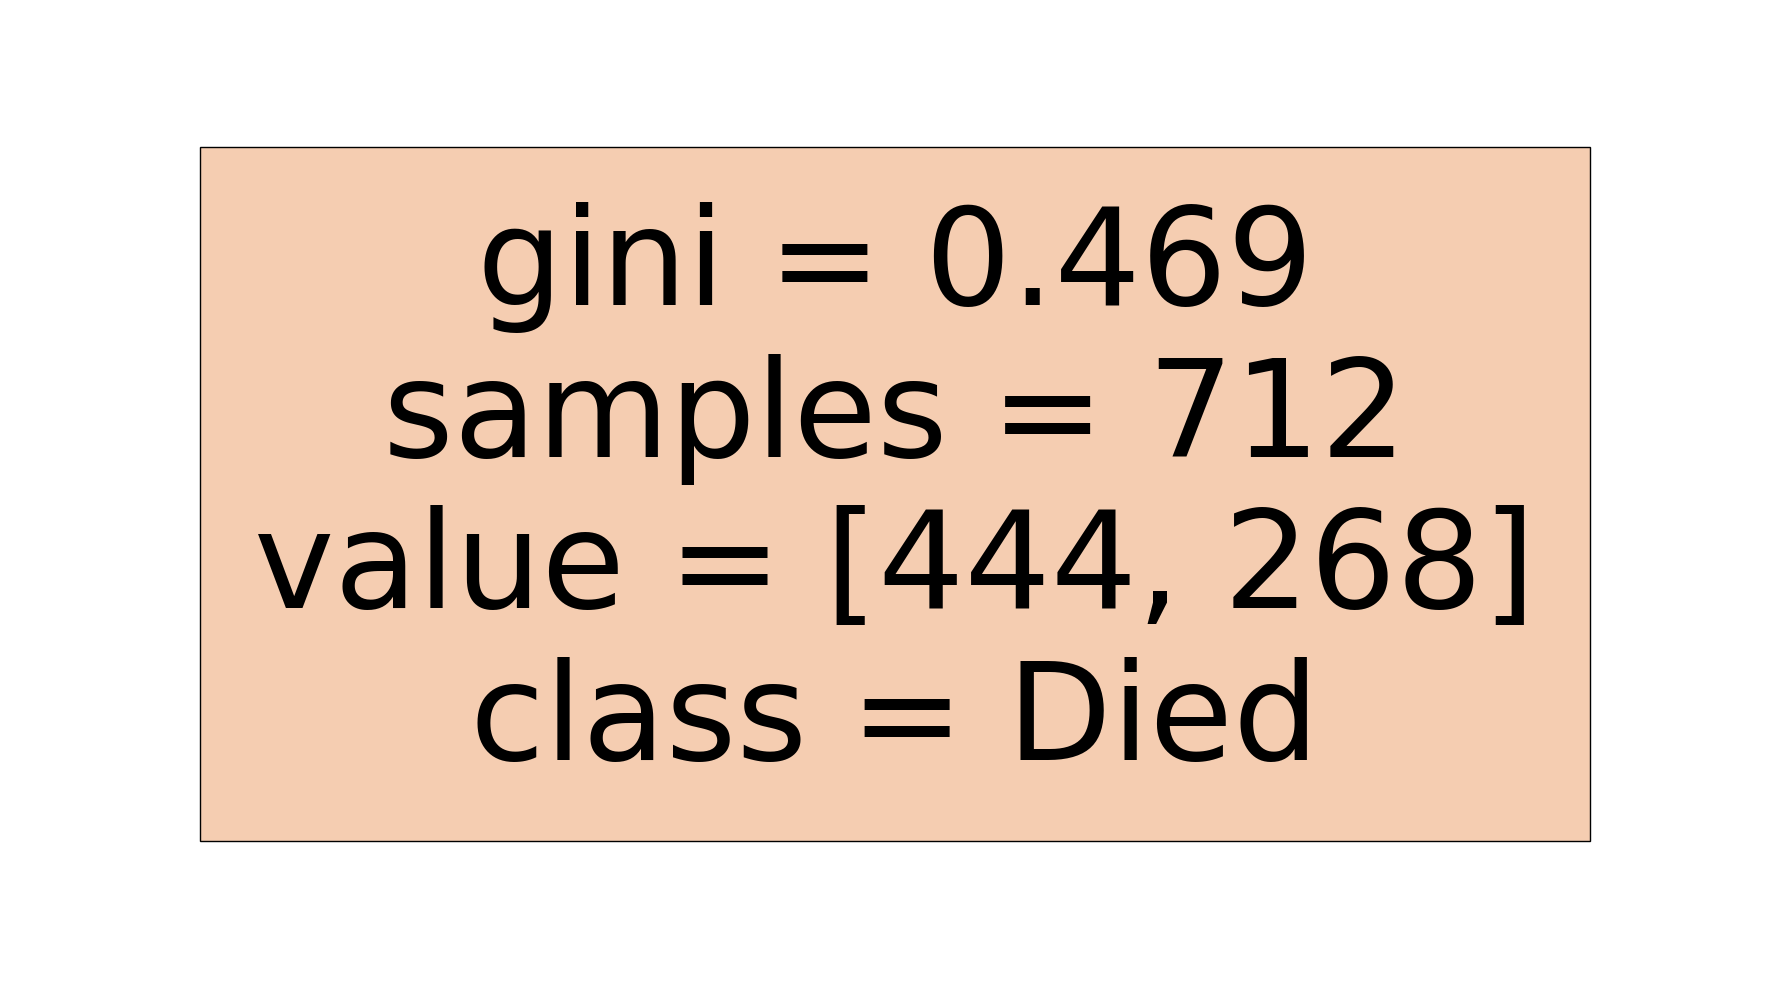

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
    
)

plt.tight_layout()
plt.show()